## Exploring the Data

In [68]:
import pandas as pd
import geopandas as gpd

#override max columns displayed
pd.set_option('display.max_columns', None)


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
path = '../data/consolidated/'
weather_data = pd.read_csv(path+'consolidated_weather_from_centroids.csv')
columns = list(weather_data.columns)
columns[0] = 'Hour'
weather_data.columns = columns

In [4]:
weather_data.head()

,Hour,valid_time,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file
0,0,2003-01-01 00:00:00,4.169556,-1.214157,259.06860,262.64050,0.0,1.907349e-06,48.75,-82.0,Northeast_centroid_weather
1,1,2003-01-01 01:00:00,4.098358,-1.437256,259.24854,262.53380,0.0,9.536743e-07,48.75,-82.0,Northeast_centroid_weather
2,2,2003-01-01 02:00:00,4.197708,-1.892502,258.54254,261.63712,0.0,3.814697e-06,48.75,-82.0,Northeast_centroid_weather
3,3,2003-01-01 03:00:00,3.741165,-2.575897,255.86873,258.89398,0.0,8.583069e-06,48.75,-82.0,Northeast_centroid_weather
4,4,2003-01-01 04:00:00,3.124802,-2.671005,255.42903,258.67328,0.0,9.536743e-06,48.75,-82.0,Northeast_centroid_weather


Checking if the centroids fall in the shape map.

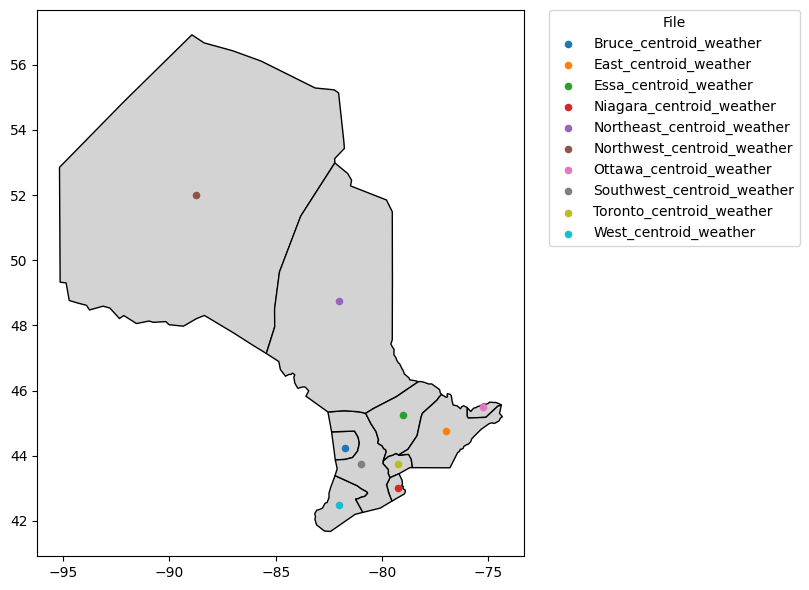

In [5]:
import matplotlib.pyplot as plt
import geopandas as gpd

# read data
shapemap = gpd.read_file('../data/tenzones_ieso.geojson')
centroids = weather_data[['longitude', 'latitude', 'file']].drop_duplicates()

fig, ax = plt.subplots(figsize=(8, 6))

# plot map
shapemap.plot(ax=ax, color='lightgrey', edgecolor='black')

# plot centroids by file
for file_name, group in centroids.groupby('file'):
    ax.scatter(
        group['longitude'],
        group['latitude'],
        s=20,
        label=file_name
    )

# legend **outside** to the right
ax.legend(
    title="File",
    bbox_to_anchor=(1.05, 1),   # x, y position relative to the axes
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()


In [39]:
# now read demand data
demand_data = pd.read_csv(path+'consolidatedIESOdemand.csv')
demand_data.head()

/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_36814/3917683950.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  demand_data = pd.read_csv(path+'consolidatedIESOdemand.csv')


,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year
0,2003-05-01,1,13702,809,1284,965,765,4422,622,41,2729,617,1611,13865,163,2003
1,2003-05-01,2,13578,825,1283,923,752,4340,602,43,2731,615,1564,13678,100,2003
2,2003-05-01,3,13411,834,1277,910,751,4281,591,45,2696,596,1553,13534,123,2003
3,2003-05-01,4,13501,835,1277,922,758,4281,599,41,2724,609,1544,13590,89,2003
4,2003-05-01,5,14010,847,1268,993,804,4469,643,51,2842,579,1592,14088,78,2003


In [7]:
demand_data.head()

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year
0,2003-05-01,1,13702,809,1284,965,765,4422,622,41,2729,617,1611,13865,163,2003
1,2003-05-01,2,13578,825,1283,923,752,4340,602,43,2731,615,1564,13678,100,2003
2,2003-05-01,3,13411,834,1277,910,751,4281,591,45,2696,596,1553,13534,123,2003
3,2003-05-01,4,13501,835,1277,922,758,4281,599,41,2724,609,1544,13590,89,2003
4,2003-05-01,5,14010,847,1268,993,804,4469,643,51,2842,579,1592,14088,78,2003


In [8]:
demand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196391 entries, 0 to 196390
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Date            196391 non-null  object
 1   Hour            196391 non-null  int64 
 2   Ontario Demand  196391 non-null  int64 
 3   Northwest       196391 non-null  int64 
 4   Northeast       196391 non-null  int64 
 5   Ottawa          196391 non-null  int64 
 6   East            196391 non-null  int64 
 7   Toronto         196391 non-null  int64 
 8   Essa            196391 non-null  int64 
 9   Bruce           196391 non-null  int64 
 10  Southwest       196391 non-null  int64 
 11  Niagara         196391 non-null  int64 
 12  West            196391 non-null  int64 
 13  Zone Total      196391 non-null  int64 
 14  Diff            196391 non-null  object
 15  Year            196391 non-null  int64 
dtypes: int64(14), object(2)
memory usage: 24.0+ MB


Now for the price data

In [ ]:
price_data = pd.read_csv(path+'prices_zonal.csv')

,Unnamed: 0,Zones_Date,Hour_of_Day,Reference_Richview,North West_Atikokan,North West_Pineportage,North West_Thunderbay,North East_Andrews,North East_Canyon,North East_NPIroqfalls,Ottawa_TAOHSC,East_Saunders,Toronto_Darlington,Essa_Desjoachims,Bruce_BruceB,South West_GerdauCam,Niagara_BECK2,West_Greenfield
0,2,2002-10-04,1,31.710000000,23.670000000,20.330000000,23.320000000,24.390000000,28.070000000,28.320000000,33.030000000,31.400000000,32.030000000,29.920000000,31.090000000,31.370000000,32.030000000,31.430000000
1,3,2002-10-04,2,33.300000000,24.850000000,21.350000000,24.490000000,26.890000000,29.470000000,29.740000000,34.690000000,32.970000000,33.640000000,31.420000000,32.650000000,32.940000000,33.640000000,33.000000000
2,4,2002-10-04,3,31.250000000,23.320000000,20.030000000,22.980000000,28.900000000,27.650000000,27.900000000,32.550000000,30.940000000,31.570000000,29.480000000,30.640000000,30.910000000,31.570000000,30.970000000
3,5,2002-10-04,4,31.410000000,23.440000000,20.140000000,23.100000000,26.590000000,27.800000000,28.050000000,32.720000000,31.100000000,31.730000000,29.630000000,30.800000000,31.070000000,31.730000000,31.130000000
4,6,2002-10-04,5,31.780000000,23.720000000,20.370000000,23.370000000,24.440000000,28.120000000,28.370000000,33.100000000,31.460000000,32.100000000,29.980000000,31.160000000,31.430000000,32.100000000,31.490000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197731,197779,2025-04-30,20,37.960000000,33.010000000,32.170000000,NaN,35.150000000,37.220000000,36.150000000,37.960000000,37.220000000,37.580000000,37.580000000,36.850000000,37.960000000,37.220000000,37.960000000
197732,197780,2025-04-30,21,30.700000000,26.690000000,26.010000000,NaN,28.420000000,30.100000000,29.240000000,30.700000000,30.100000000,30.390000000,30.390000000,29.800000000,30.700000000,30.100000000,30.700000000
197733,197781,2025-04-30,22,37.730000000,32.810000000,31.980000000,NaN,34.940000000,36.990000000,35.940000000,37.730000000,36.990000000,37.360000000,37.360000000,36.630000000,37.730000000,36.990000000,37.730000000
197734,197782,2025-04-30,23,36.350000000,31.610000000,30.810000000,NaN,33.660000000,35.640000000,34.620000000,36.350000000,35.640000000,35.990000000,35.990000000,35.290000000,36.350000000,35.640000000,36.350000000


In [47]:
%pip install duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 18.2 MB/s  0:00:00 eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# Data Cleaning and Feature Engineering

In [9]:
# convert fromm kelvin to celsius
weather_data['temp_C_t2m'] = weather_data['t2m'] - 273.15

In [10]:
# show average temperatures
pd.set_option('display.float_format', lambda x: '%.9f' % x)
weather_data['temp_C_t2m'].describe()

count   2004720.000000000
mean          6.662419457
std          11.948470872
min         -45.063900000
25%          -1.136880000
50%           7.163570000
75%          16.441212500
max          37.167720000
Name: temp_C_t2m, dtype: float64

In [74]:
import sys
import importlib

sys.path.append('../scripts/')
import FeatureEngineering
importlib.reload(FeatureEngineering)

dataset = FeatureEngineering.CleanedDataset(weather_data, demand_data, price_data)

In [75]:
datamerged = dataset.merge_datasets()
datamerged.sort_values(by=['file', 'Date']).head(48)

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file,temp_C_t2m,Hour_of_Day,Reference_Richview,North West_Atikokan,North West_Pineportage,North West_Thunderbay,North East_Andrews,North East_Canyon,North East_NPIroqfalls,Ottawa_TAOHSC,East_Saunders,Toronto_Darlington,Essa_Desjoachims,Bruce_BruceB,South West_GerdauCam,Niagara_BECK2,West_Greenfield
1133266,2004-01-01 00:00:00,1,14703,811,1406,1197,903,4606,859,53,2790,542,1670,14837,134,2004,10.436722000,-2.628097500,268.592960000,274.277950000,0.000000000,0.000000954,44.250000000,-81.750000000,Bruce_centroid_weather,1.127950000,1,31.910000000,23.100000000,19.840000000,22.920000000,23.810000000,27.390000000,27.630000000,32.240000000,30.640000000,31.260000000,29.200000000,30.340000000,30.610000000,31.260000000,30.670000000
1133267,2004-01-01 01:00:00,2,14130,805,1412,1095,889,4366,794,53,2698,516,1603,14231,101,2004,10.491440000,-3.361358600,268.799200000,274.068400000,0.000000000,0.000004768,44.250000000,-81.750000000,Bruce_centroid_weather,0.918400000,2,29.550000000,21.390000000,18.370000000,21.230000000,22.040000000,25.360000000,25.590000000,29.850000000,28.380000000,28.950000000,27.040000000,28.100000000,28.340000000,28.950000000,28.400000000
1133268,2004-01-01 02:00:00,3,13575,795,1358,1053,842,4188,747,50,2582,507,1553,13675,100,2004,9.877060000,-4.244293000,269.045650000,274.056100000,0.000000000,0.000012398,44.250000000,-81.750000000,Bruce_centroid_weather,0.906100000,3,27.680000000,20.040000000,17.210000000,19.890000000,20.650000000,23.760000000,23.970000000,27.970000000,26.580000000,27.120000000,25.330000000,26.320000000,26.550000000,27.120000000,26.610000000
1133269,2004-01-01 03:00:00,4,13280,789,1355,1027,817,4046,718,52,2549,517,1512,13382,102,2004,8.785461000,-4.654403700,269.179720000,274.193270000,0.000000000,0.000010490,44.250000000,-81.750000000,Bruce_centroid_weather,1.043270000,4,25.520000000,18.470000000,15.870000000,18.340000000,19.040000000,21.910000000,22.100000000,25.790000000,24.510000000,25.000000000,23.350000000,24.260000000,24.480000000,25.000000000,24.530000000
1133270,2004-01-01 04:00:00,5,13219,779,1354,1018,811,3974,709,50,2534,529,1501,13259,40,2004,7.959579500,-4.542907700,269.336730000,274.298160000,0.000000000,0.000006199,44.250000000,-81.750000000,Bruce_centroid_weather,1.148160000,5,24.750000000,17.910000000,15.390000000,17.780000000,18.460000000,21.240000000,21.430000000,25.000000000,23.770000000,24.250000000,22.650000000,23.530000000,23.740000000,24.250000000,23.790000000
1133271,2004-01-01 05:00:00,6,13354,776,1351,1034,829,3966,716,52,2551,531,1509,13315,-39,2004,8.172653000,-3.857940700,269.578670000,274.278600000,0.000000000,0.000021935,44.250000000,-81.750000000,Bruce_centroid_weather,1.128600000,6,31.130000000,22.540000000,19.350000000,22.370000000,23.230000000,26.720000000,26.960000000,31.450000000,29.890000000,30.500000000,28.490000000,29.600000000,29.870000000,30.500000000,29.920000000
1133272,2004-01-01 06:00:00,7,13462,777,1339,1067,862,4023,742,57,2587,455,1531,13440,-22,2004,8.050049000,-3.897705000,269.640720000,274.337700000,0.000000000,0.000021458,44.250000000,-81.750000000,Bruce_centroid_weather,1.187700000,7,32.870000000,23.800000000,20.440000000,23.620000000,24.530000000,28.220000000,28.470000000,33.220000000,31.570000000,32.210000000,30.080000000,31.260000000,31.540000000,32.210000000,31.600000000
1133273,2004-01-01 07:00:00,8,13538,756,1334,1135,857,4082,774,58,2623,460,1557,13636,98,2004,7.448654000,-4.284515400,269.600280000,274.449400000,0.000000000,0.000009060,44.250000000,-81.750000000,Bruce_centroid_weather,1.299400000,8,21.250000000,15.380000000,13.210000000,15.270000000,15.860000000,18.240000000,18.400000000,21.470000000,20.410000000,20.820000000,19.440000000,20.210000000,20.390000000,20.820000000,20.430000000
1133274,2004-01-01 08:00:00,9,13675,764,1347,1216,842,4112,813,58,2665,454,1555,13826,15

In [33]:
# make sure that date is unique
# show non unique dates
merged_data = dataset.merge_datasets()
non_unique_dates = merged_data[merged_data.duplicated(subset=['Date'], keep=False)]
non_unique_dates

,Date,Hour_x,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,...,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file,temp_C_t2m
0,2004-01-01 23:00:00,24,15372,840,1406,1269,944,4826,918,66,...,-2.231506300,1.753311200,257.463870000,259.365140000,0.000000000,0.000000954,48.750000000,-82.000000000,Northeast_centroid_weather,-13.784860000
1,2004-01-01 23:00:00,24,15372,840,1406,1269,944,4826,918,66,...,-3.953186000,1.948623700,270.909180000,274.107330000,0.000000000,0.000000000,42.500000000,-82.000000000,West_centroid_weather,0.957330000
2,2004-01-01 23:00:00,24,15372,840,1406,1269,944,4826,918,66,...,-2.505920400,2.327530000,258.473630000,260.253800000,0.000000000,0.000008583,52.000000000,-88.750000000,Northwest_centroid_weather,-12.896200000
3,2004-01-01 23:00:00,24,15372,840,1406,1269,944,4826,918,66,...,-1.256897000,-1.331649800,264.375980000,269.400300000,0.000000000,0.000000000,44.750000000,-77.000000000,East_centroid_weather,-3.749700000
4,2004-01-01 23:00:00,24,15372,840,1406,1269,944,4826,918,66,...,1.071228000,-1.932235700,261.524400000,268.191300000,0.000000000,0.000000000,45.500000000,-75.250000000,Ottawa_centroid_weather,-4.958700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905115,2025-09-25 23:00:00,24,14566,444,1157,793,818,5236,846,95,...,2.477707000,-2.325607300,288.264000000,290.610400000,214976.000000000,0.000000000,43.750000000,-81.000000000,Southwest_centroid_weather,17.460400000
1905116,2025-09-25 23:00:00,24,14566,444,1157,793,818,5236,846,95,...,2.451339700,-3.390060400,288.219100000,289.030330000,250048.000000000,0.000000000,44.250000000,-81.750000000,Bruce_centroid_weather,15.880330000
1905117,2025-09-25 23:00:00,24,14566,444,1157,793,818,5236,846,95,...,1.710128800,-1.216232300,291.215180000,292.372130000,116288.000000000,0.000124455,43.750000000,-79.250000000,Toronto_centroid_weather,19.222130000
1905118,2025-09-25 23:00:00,24,14566,444,1157,793,818,5236,846,95,...,2.604660000,0.222244260,288.898770000,291.346740000,122176.000000000,0.000035763,45.250000000,-79.000000000,Essa_centroid_weather,18.196740000


In [38]:
merged_data.sort_values(by=['file', 'Date']).head(24)

,Date,Hour_x,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,...,v10,d2m,t2m,ssrd,tp,latitude,longitude,file,temp_C_t2m,date_only
16,2004-01-01 00:00:00,1,14703,811,1406,1197,903,4606,859,53,...,-2.628097500,268.592960000,274.277950000,0.000000000,0.000000954,44.250000000,-81.750000000,Bruce_centroid_weather,1.127950000,2004-01-01
26,2004-01-01 01:00:00,2,14130,805,1412,1095,889,4366,794,53,...,-3.361358600,268.799200000,274.068400000,0.000000000,0.000004768,44.250000000,-81.750000000,Bruce_centroid_weather,0.918400000,2004-01-01
36,2004-01-01 02:00:00,3,13575,795,1358,1053,842,4188,747,50,...,-4.244293000,269.045650000,274.056100000,0.000000000,0.000012398,44.250000000,-81.750000000,Bruce_centroid_weather,0.906100000,2004-01-01
46,2004-01-01 03:00:00,4,13280,789,1355,1027,817,4046,718,52,...,-4.654403700,269.179720000,274.193270000,0.000000000,0.000010490,44.250000000,-81.750000000,Bruce_centroid_weather,1.043270000,2004-01-01
56,2004-01-01 04:00:00,5,13219,779,1354,1018,811,3974,709,50,...,-4.542907700,269.336730000,274.298160000,0.000000000,0.000006199,44.250000000,-81.750000000,Bruce_centroid_weather,1.148160000,2004-01-01
66,2004-01-01 05:00:00,6,13354,776,1351,1034,829,3966,716,52,...,-3.857940700,269.578670000,274.278600000,0.000000000,0.000021935,44.250000000,-81.750000000,Bruce_centroid_weather,1.128600000,2004-01-01
76,2004-01-01 06:00:00,7,13462,777,1339,1067,862,4023,742,57,...,-3.897705000,269.640720000,274.337700000,0.000000000,0.000021458,44.250000000,-81.750000000,Bruce_centroid_weather,1.187700000,2004-01-01
86,2004-01-01 07:00:00,8,13538,756,1334,1135,857,4082,774,58,...,-4.284515400,269.600280000,274.449400000,0.000000000,0.000009060,44.250000000,-81.750000000,Bruce_centroid_weather,1.299400000,2004-01-01
96,2004-01-01 08:00:00,9,13675,764,1347,1216,842,4112,813,58,...,-4.576294000,269.553830000,274.502700000,0.000000000,0.000004768,44.250000000,-81.750000000,Bruce_centroid_weather,1.352700000,2004-01-01
106,2004-01-01 09:00:00,10,14234,769,1379,1280,879,4301,869,60,...,-4.423385600,269.445500000,274.516000000,0.000000000,0.000001907,44.250000000,-81.750000000,Bruce_centroid_weather,1.366000000,2004-01-01


Test to ensure every day has a full 24 hours.

In [ ]:
# merged_data['date_only'] = merged_data['Date'].dt.date

# hours_per_day = merged_data.groupby('date_only')['Date'].count()

# incomplete_days = hours_per_day[hours_per_day < 24]
# incomplete_days

date_only
2025-09-25    10
Name: Date, dtype: int64